In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


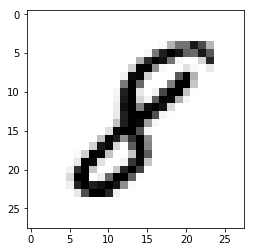

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

W0725 09:21:20.824079 140596001605440 deprecation.py:323] From /home/ijl20/src/jupyterlab/venv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 237us/sample - loss: 0.2014 - accuracy: 0.9403
Epoch 2/10
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0808 - accuracy: 0.9752
Epoch 3/10
60000/60000 [==============================] - 13s 216us/sample - loss: 0.0568 - accuracy: 0.9817
Epoch 4/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.0422 - accuracy: 0.9862
Epoch 5/10
60000/60000 [==============================] - 14s 233us/sample - loss: 0.0344 - accuracy: 0.9891
Epoch 6/10
60000/60000 [==============================] - 15s 246us/sample - loss: 0.0284 - accuracy: 0.9898
Epoch 7/10
60000/60000 [==============================] - 15s 244us/sample - loss: 0.0252 - accuracy: 0.9914
Epoch 8/10
60000/60000 [==============================] - 15s 252us/sample - loss: 0.0220 - accuracy: 0.9924
Epoch 9/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.0188 - accuracy: 0.9

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 98us/sample - loss: 0.0630 - accuracy: 0.9848


[0.06302738734059021, 0.9848]

In [8]:
image_index = 7800
category_name = ['ZERO','ONE','TWO','THREE','FOUR','FIVE','SIX','SEVEN','EIGHT','NINE']
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

[[ 0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]]
Index 7802 Category: ONE Label: ONE [[ 0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]]


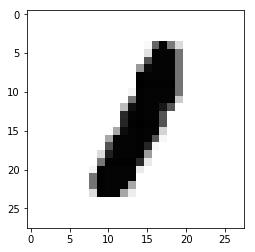

In [10]:
image_index += 1
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred)
print('Index {0} Category: {1} Label: {2} {3}'.format(image_index, category_name[pred.argmax()],category_name[y_test[image_index]], pred))

In [ ]:
from IPython.display import display, Markdown

In [ ]:
display(Markdown('# foo'))